In [18]:
import sys
import os
import json
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *

In [19]:
external = os.path.join("/media","jofrony","2TB", 
                        "dardel", "current_bgd2","branch_inhibition", 
                        "supercomputer", "networks")
repository = os.path.join("/home","jofrony","Documents",
                          "Repositories","current_bgd2",
                          "branch_inhibition","supercomputer","networks")

In [20]:
folder = "dendrite_traces"

In [21]:
plateau_ids = os.path.join(repository,
                           "pdc_network_2022-10-25",
                          "cell_ids_plateaus.json")
with open(plateau_ids) as f:
    plateau_ids = json.load(f)

In [22]:
e = Experiments()
e.add_experiment(name="plateaus_without_inhibition",
                 color="black",
                 label="plateaus without inhibition",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-25"),
                 output="network_output_modified_GABA_90mV_external-whole-network-plateaus-2022-10-25-16-56-46_no_inhibition.hdf5")
e.add_experiment(name="plateaus_with_inhibition",
                 color="red",
                 label="plateaus with inhibition",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-10-25"),
                 output="network_output_modified_GABA_90mV_external-whole-network-plateaus-2022-10-25-16-56-46_cell_ids_current_injection_dardel_2022-10-25-16-58-26_plateau_inhibition_p1.hdf5")

e.experiments     

{'plateaus_without_inhibition': {'color': 'black',
  'label': 'plateaus without inhibition',
  'network': 'network-synapses.hdf5',
  'path': '/media/jofrony/2TB/dardel/current_bgd2/branch_inhibition/supercomputer/networks/pdc_network_2022-10-25',
  'output': 'network_output_modified_GABA_90mV_external-whole-network-plateaus-2022-10-25-16-56-46_no_inhibition.hdf5'},
 'plateaus_with_inhibition': {'color': 'red',
  'label': 'plateaus with inhibition',
  'network': 'network-synapses.hdf5',
  'path': '/media/jofrony/2TB/dardel/current_bgd2/branch_inhibition/supercomputer/networks/pdc_network_2022-10-25',
  'output': 'network_output_modified_GABA_90mV_external-whole-network-plateaus-2022-10-25-16-56-46_cell_ids_current_injection_dardel_2022-10-25-16-58-26_plateau_inhibition_p1.hdf5'}}

In [23]:
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=False)

Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/branch_inhibition/supercomputer/networks/pdc_network_2022-10-25/simulation/network_output_modified_GABA_90mV_external-whole-network-plateaus-2022-10-25-16-56-46_no_inhibition.hdf5
Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/branch_inhibition/supercomputer/networks/pdc_network_2022-10-25/simulation/network_output_modified_GABA_90mV_external-whole-network-plateaus-2022-10-25-16-56-46_cell_ids_current_injection_dardel_2022-10-25-16-58-26_plateau_inhibition_p1.hdf5


In [24]:
sample_ids = plateau_ids['plateaus'][::100]
sample_ids_per_exp = {k:sample_ids for k in e.experiments}

In [25]:
%%time
neuron_type = "dSPN"
dendritic_voltage = dendrite_voltage(data_obj=sl, neuron_type=neuron_type, specific_trace_ids=sample_ids_per_exp, interval=[0.5, 2.5], dt_step=0.5)
average_dendritic_voltages = average_dendritic_voltage(dvoltage=dendritic_voltage)

  dSPN and 20 traces
  dSPN and 20 traces
CPU times: user 1.36 s, sys: 101 ms, total: 1.46 s
Wall time: 3.01 s


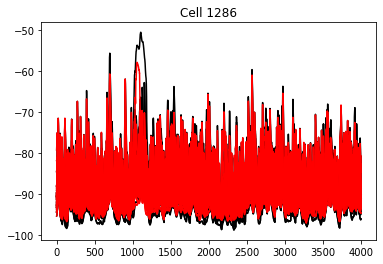

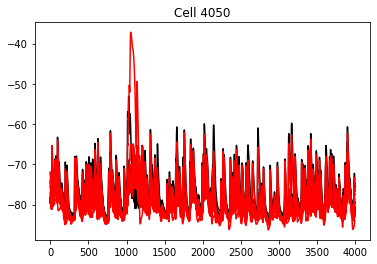

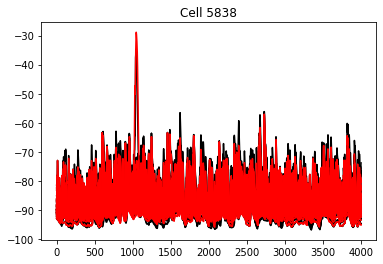

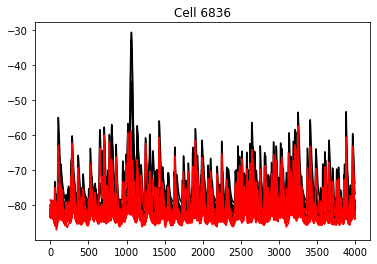

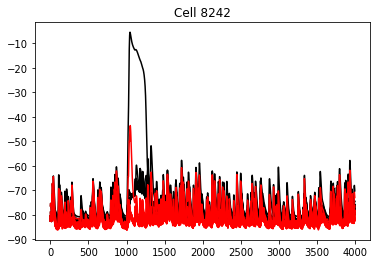

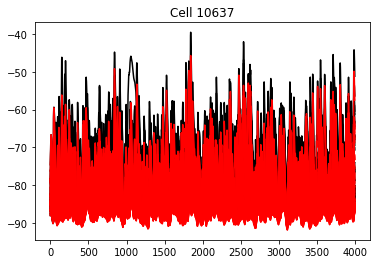

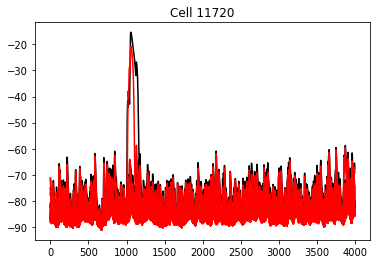

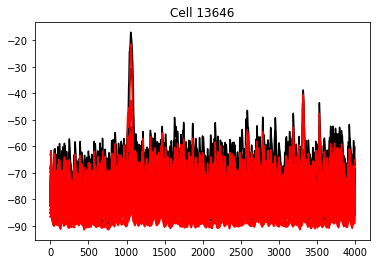

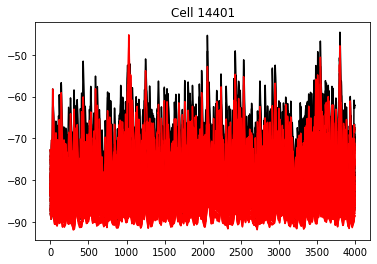

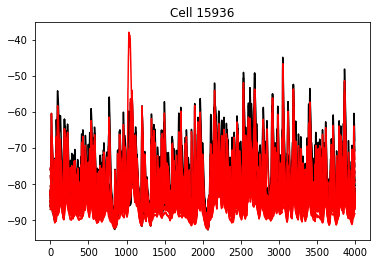

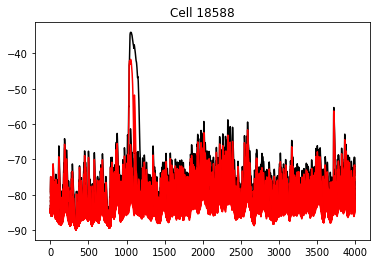

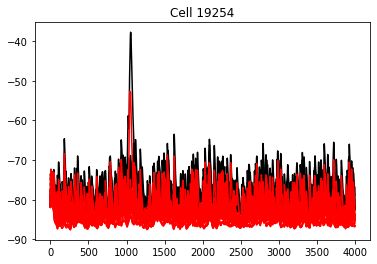

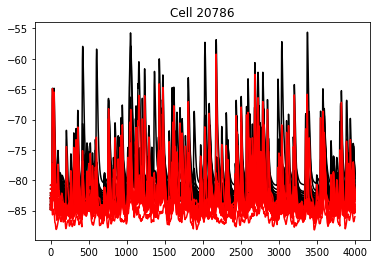

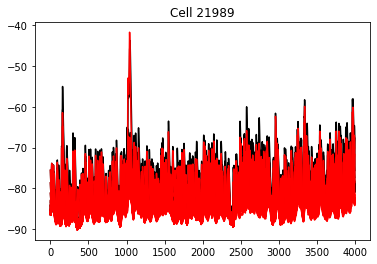

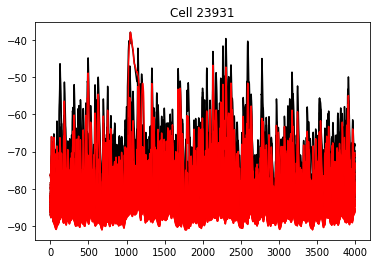

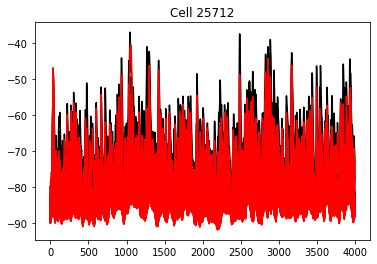

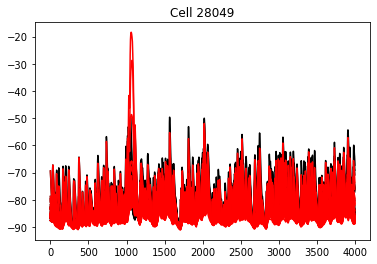

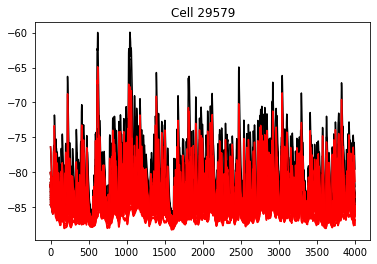

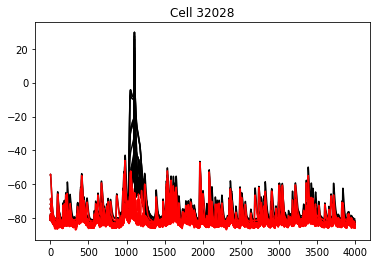

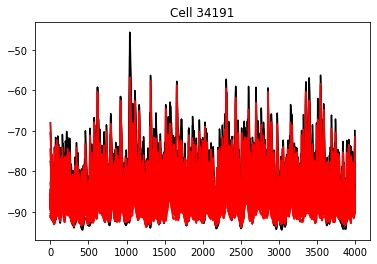

In [26]:
import matplotlib.pyplot as plt
cs = {"plateaus_without_inhibition": 'black', 
      "plateaus_with_inhibition": 'red'}
for i in sample_ids:
    plt.figure()
    plt.title(f"Cell {i}")
    for exp, data in dendritic_voltage.items():
        for secs, vs in data[i].items():
            plt.plot(vs,c=cs[exp])

In [27]:
tmp = dict()
tmp_corrected = dict()
skip = 500
import numpy as np
for exp, data in average_dendritic_voltages.items():
    v_s = list()
    for cell_id, v in data.items():
        v_s.append(v[skip:])
    tmp.update({exp: np.mean(v_s, axis=0)})
    tmp_corrected.update({exp: np.mean(v_s, axis=0) - np.min(np.mean(v_s, axis=0))})

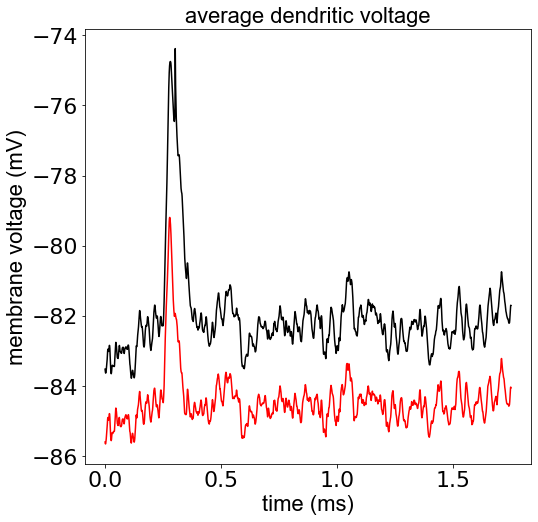

In [28]:
plot_average_dendritic_voltage(tmp, name="dSPN", colors=cs, dt_step=0.5e-3)

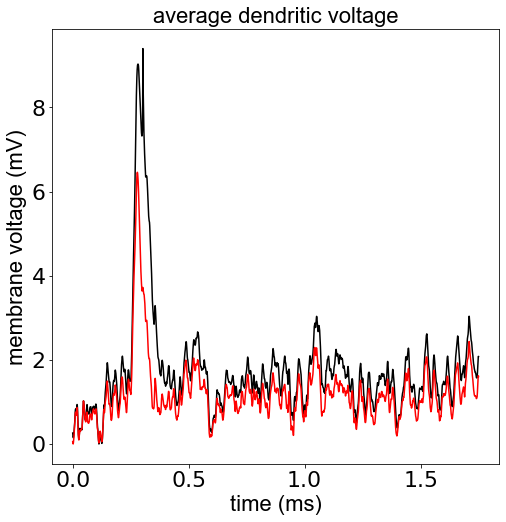

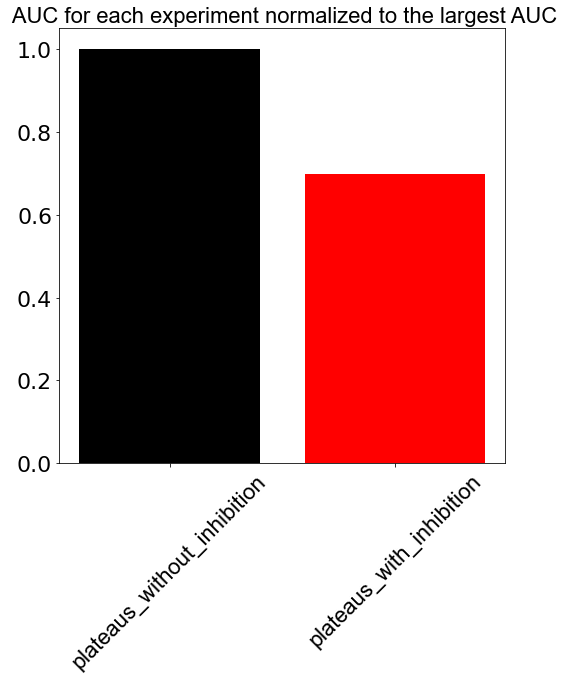

In [29]:

plot_average_dendritic_voltage(tmp_corrected, name="dSPN", colors=cs, dt_step=0.5e-3)
auc = calculate_AUC(tmp, parameters={"dx":0.5e-3})
plot_AUC(auc, experiment_names=e,colors=cs, name="dSPN")

In [30]:
%%time
neuron_type = "iSPN"
dendritic_voltage = dendrite_voltage(data_obj=sl, neuron_type=neuron_type, specific_trace_ids=sample_ids_per_exp, interval=[0.5, 2.5], dt_step=0.5)
average_dendritic_voltages = average_dendritic_voltage(dvoltage=dendritic_voltage)

  iSPN and 20 traces
  iSPN and 20 traces
CPU times: user 661 ms, sys: 36.1 ms, total: 698 ms
Wall time: 696 ms


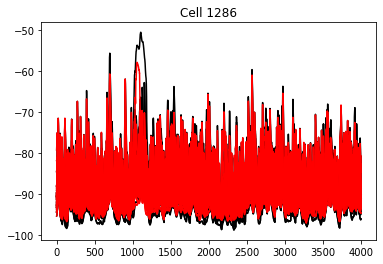

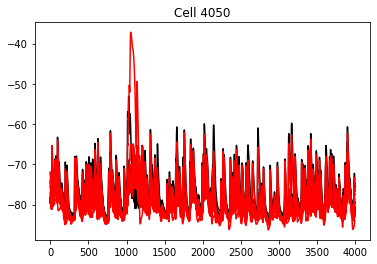

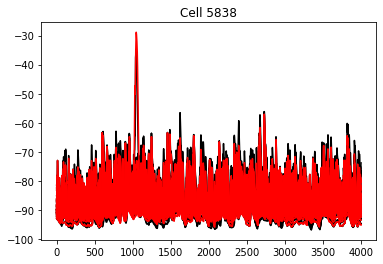

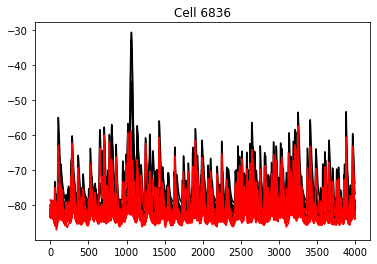

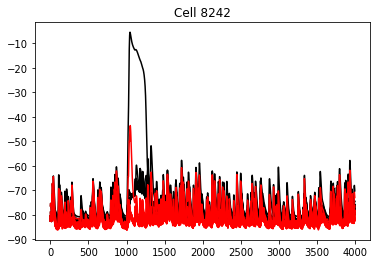

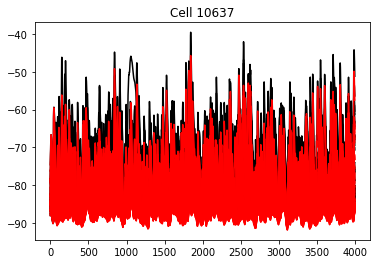

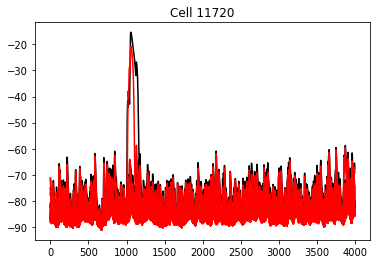

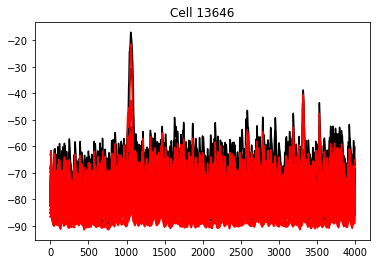

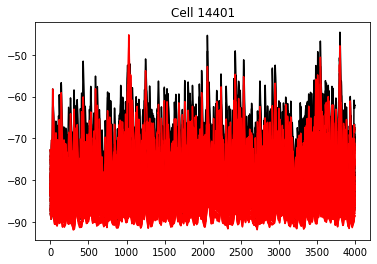

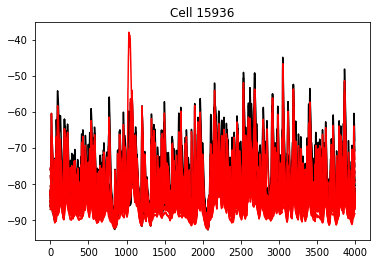

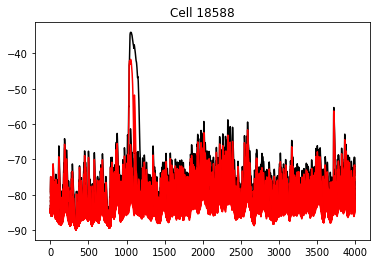

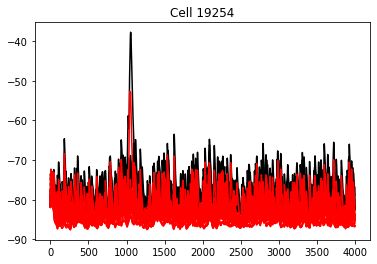

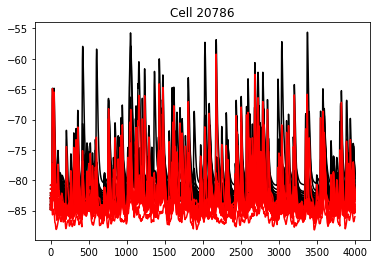

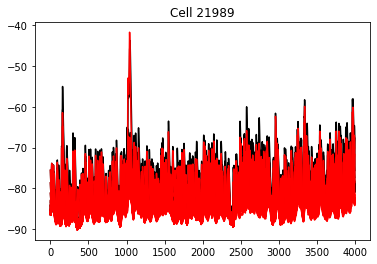

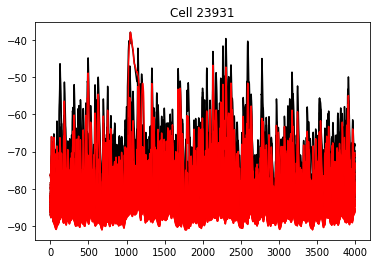

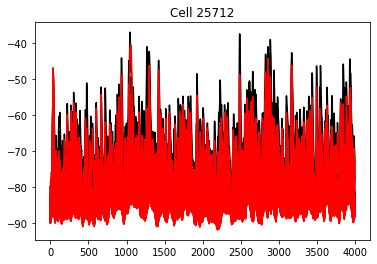

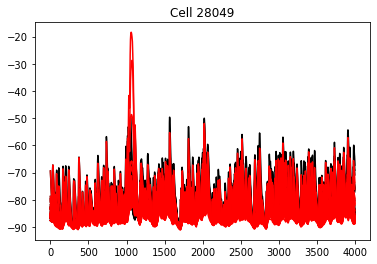

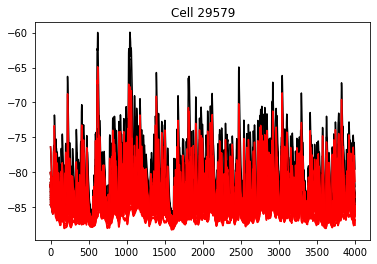

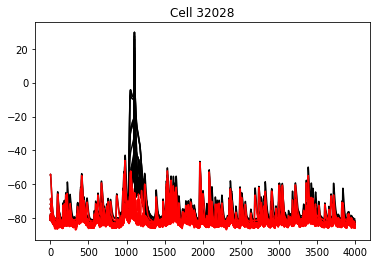

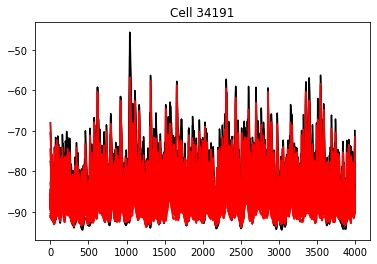

In [31]:
import matplotlib.pyplot as plt
cs = {"plateaus_without_inhibition": 'black', 
      "plateaus_with_inhibition": 'red'}
for i in sample_ids:
    plt.figure()
    plt.title(f"Cell {i}")
    for exp, data in dendritic_voltage.items():
        for secs, vs in data[i].items():
            plt.plot(vs,c=cs[exp])

In [32]:
tmp = dict()
tmp_corrected = dict()
skip = 500
import numpy as np
for exp, data in average_dendritic_voltages.items():
    v_s = list()
    for cell_id, v in data.items():
        v_s.append(v[skip:])
    tmp.update({exp: np.mean(v_s, axis=0)})
    tmp_corrected.update({exp: np.mean(v_s, axis=0) - np.min(np.mean(v_s, axis=0))})

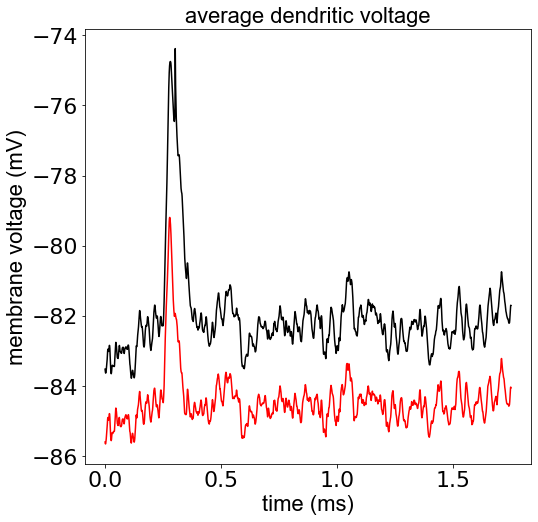

In [33]:
plot_average_dendritic_voltage(tmp, name="iSPN", colors=cs, dt_step=0.5e-3)

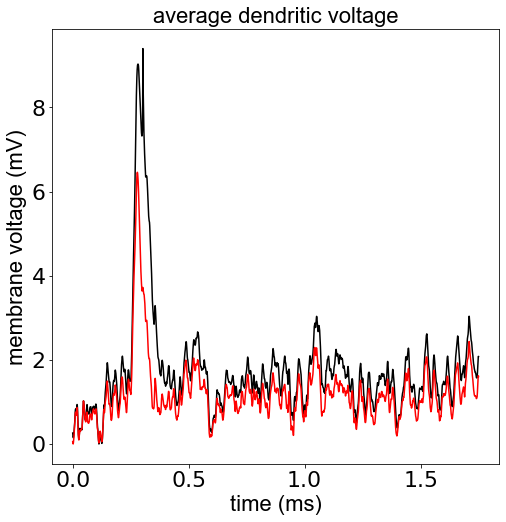

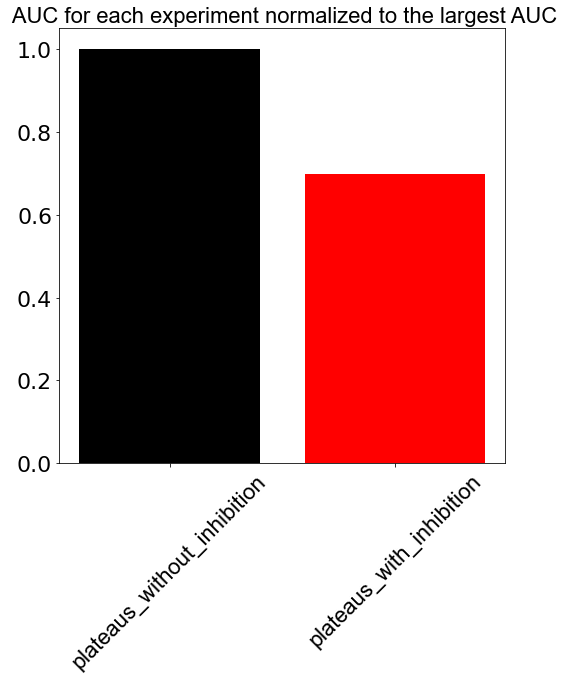

In [34]:

plot_average_dendritic_voltage(tmp_corrected, name="iSPN", colors=cs, dt_step=0.5e-3)
auc = calculate_AUC(tmp, parameters={"dx":0.5e-3})
plot_AUC(auc, experiment_names=e,colors=cs, name="iSPN")